In [149]:
%pylab inline
import numpy as np
import scipy as scy
import matplotlib
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [280]:
#definir constantes de movimiento
a = 0.24250109
b = -0.0607718825
c = 0.93240737
d = 0.86473146

#definir constante de gravitacion
G=1

#Array para la posicion de los cuerpos
r1=np.array([a,-b])
r2=np.array([-a,-b])
r3=np.array([0.0,0.0])

posiciones=np.array([r1,r2,r3])

#Array para las velocidades iniciales
v1=np.array([c,d])
v2=np.array([c,d])
v3=np.array([-2*c,-2*d])

velocidad=np.array([v1,v2,v3])

#modela las fuerzas, r debe ser un arr.ay con las posiciones de las masas
def fuerza(r,v):
    fuerzas=np.array([])
    f=[]
    velocidades=np.array([])
    f1,f2,f3=0,0,0
    
    velocidades=v
    
    for i in range (1,3):
        f1-=(r[-3]-r[i])/(norm(r[-3]-r[i])**3)
        
    f.append(f1)
    
    for i in range (0,2,3):
        f2-=(r[-2]-r[i])/(norm(r[-2]-r[i])**3)
    
    f.append(f2)
    
    for i in range (0,2):
        f3-=(r[-1]-r[i])/(norm(r[-1]-r[i])**3)
    
    f.append(f3)
    
    fuerzas=f

    return np.array([velocidades,fuerzas])
         

In [281]:
fuerza(posiciones,velocidad)

array([[[  0.93240737,   0.86473146],
        [  0.93240737,   0.86473146],
        [ -1.86481474,  -1.72946292]],

       [[-19.77128022,  -3.88940045],
        [  4.25121059,   0.        ],
        [  0.        ,   7.77880089]]])

In [282]:
def runge_kutta_force(dt,A,B):
    k1=fuerza(A,B)
    print k1
    kn=(k1*0.5*dt)
    #print kn
    k2=fuerza((A + kn[1]),(B+kn[0]))
    kn=k2*0.5*dt
    #print kn
    k3=fuerza((A + kn[1]),(B+kn[0]))
    kn=k3*dt
    #print kn
    k4=fuerza((A + kn[1]),(B +kn[0]))
    #print kn
    #kn=0
    A+=dt*(1./6.*k1[1] + 1./3.*k2[1] + 1./3.*k3[1] + 1./6.*k4[1])
    B+=dt*(1./6.*k1[0] + 1./3.*k2[0] + 1./3.*k3[0] + 1./6.*k4[0])
    return np.array([A,B])

In [283]:
x=runge_kutta_force(0.1,posiciones,velocidad)
print x
y=runge_kutta_force(0.1,x[0],x[1])
print y
z=runge_kutta_force(0.1,y[0],y[1])
print z

[[[  0.93240737   0.86473146]
  [  0.93240737   0.86473146]
  [ -1.86481474  -1.72946292]]

 [[-19.77128022  -3.88940045]
  [  4.25121059   0.        ]
  [  0.           7.77880089]]]
[[[-0.0707285   0.5748169 ]
  [-0.18439333 -0.47246225]
  [-0.08636628 -0.29336194]]

 [[ 1.03046943  0.95567599]
  [ 1.03046943  0.95567599]
  [-2.06093886 -1.91135198]]]
[[[  1.03046943   0.95567599]
  [  1.03046943   0.95567599]
  [ -2.06093886  -1.91135198]]

 [[ -0.12111777  -2.22195434]
  [  0.09723216   0.89587262]
  [-11.4935848  -19.71691222]]]
[[[-0.09017027  0.34208273]
  [-0.16756354 -0.33541805]
  [-0.66554513 -1.11177575]]

 [[ 1.13884476  1.05618523]
  [ 1.13884476  1.05618523]
  [-2.27768952 -2.11237046]]]
[[[ 1.13884476  1.05618523]
  [ 1.13884476  1.05618523]
  [-2.27768952 -2.11237046]]

 [[-0.39459834 -2.51699183]
  [ 0.2440776   2.13665569]
  [ 0.78517275  1.36976423]]]
[[[-0.27355192 -1.26617827]
  [-0.00287584  1.23133467]
  [-0.60402877 -0.99443036]]

 [[ 1.25861801  1.16726511]
  

In [295]:
def simulate(steps,step_max):
    step_length=step_max/steps
    principio=runge_kutta_force(step_length,posiciones,velocidad)
    #print principio
    datos=[principio[0],principio[1]]
    #print datos
    for i in range(0,steps):
        y=runge_kutta_force(step_length,principio[0],principio[1])
        #print y
        principio[0]=y[0]
        principio[1]=y[1]
        datos.append(y[0])
        datos.append(y[1])
    return datos

In [293]:
data=[]
a=runge_kutta_force(0.1,posiciones,velocidad)
data.append(a[0])
data.append(a[1])
suma =0.01
while suma<=100:
    r=runge_kutta_force(0.01,data[-2],data[-1])
    data.append(r[0])
    data.append(r[1])
    suma+=0.01

[[[ 1.39098792  1.29002735]
  [ 1.39098792  1.29002735]
  [-2.78197583 -2.58005471]]

 [[-0.05558421  0.08369407]
  [ 0.0210908  -0.05625128]
  [ 0.1907414   0.03075321]]]
[[[ 1.53727927  1.4257006 ]
  [ 1.53727927  1.4257006 ]
  [-3.07455855 -2.85140121]]

 [[-0.05598256  0.08449206]
  [ 0.0212241  -0.05670311]
  [ 0.19352295  0.03117872]]]
[[[ 1.55272919  1.44002913]
  [ 1.55272919  1.44002913]
  [-3.10545838 -2.88005827]]

 [[-0.05602283  0.08457292]
  [ 0.02123757 -0.0567488 ]
  [ 0.19380672  0.03122231]]]
[[[ 1.56833438  1.45450167]
  [ 1.56833438  1.45450167]
  [-3.13666875 -2.90900334]]

 [[-0.05606317  0.08465398]
  [ 0.02125106 -0.05679459]
  [ 0.19409154  0.03126609]]]
[[[ 1.5840964   1.46911965]
  [ 1.5840964   1.46911965]
  [-3.1681928  -2.9382393 ]]

 [[-0.05610359  0.08473524]
  [ 0.02126458 -0.05684046]
  [ 0.19437741  0.03131006]]]
[[[ 1.60001683  1.48388455]
  [ 1.60001683  1.48388455]
  [-3.20003366 -2.9677691 ]]

 [[-0.05614409  0.0848167 ]
  [ 0.02127813 -0.05688644

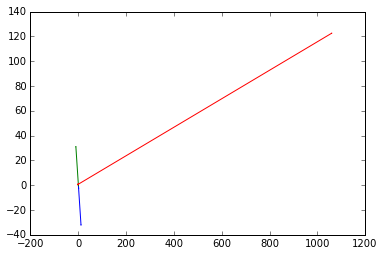

In [294]:
grafica=plt.figure()
m1x=[]
m2x=[]
m3x=[]
m1y=[]
m2y=[]
m3y=[]
for i in range(0,len(data),2):
    posicion=data[i]
    m1=posicion[0]
    m2=posicion[1]
    m3=posicion[2]
    m1x.append(m1[0])
    m1y.append(m1[1])
    m2x.append(m2[0])
    m2y.append(m2[1])
    m3x.append(m3[0])
    m3y.append(m3[1])
plot(m1x,m1y)
plot(m2x,m2y)
plot(m3x,m3y)

## Trabaje con Paula Siauchó. 